In [13]:
## Options
import pandas as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

%load_ext autoreload
%autoreload 2

## Data Loading
filePath = 'data/ghausi kbtu.xlsx'
data = pd.read_excel(filePath, header=0, index_col=0, parse_date=True)
print(data.columns)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Index([u'Ghausi_ChilledWater_Demand_kBtu', u'Ghausi_Electricity_Demand_kBtu', u'Ghausi_Steam_Demand_kBtu'], dtype='object')


In [14]:
## Imports

## Mac imports
import sys
toolPath = r'/Users/decolvin/Box Sync/UCD_ECO_coding/mypy'
sys.path.append(toolPath)

## Main Imports
import mnv11 as mnv
print(mnv.version)
import matplotlib.pyplot as plt
print("Success!")

Version 1.1
Success!


# Data Section

Q(75%): 1260.00 Q(25%): 264.00
IQR value is 996.00
Ceiling adjusted by IQR - Now 5244.00


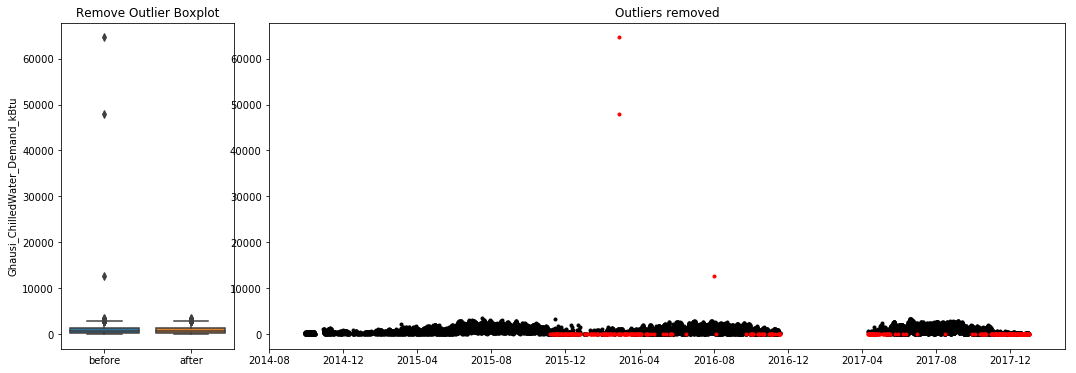

In [15]:
inputDict = {'IQRmult' : 4.0,
                 'IQR' : 'y',
                 'resampleRate' : 'D',
                 'verbosity' : 3,
                 'sliceType' : 'ranges', #half, middate, ranges
                 'midDate' : '2017-01-01', #only needed with sliceType : 'middate'
                 'dateRanges' : ['2015-01-01','2017-01-01','2017-01-01','2018-01-01'],
                 'OATname' : None,
                 'OATsource' : 'file'} #only needed with sliceType : 'ranges'}


dc = mnv.data_handler(data[data.columns[0]], inputDict)
dc.default_clean()

## Run the next line incase the y-range is FUBAR
#dc._outlier_plot(dc.modifiedData[dc.com], yrange=(-100,dc.modifiedData[dc.com].max()*1.1)) 

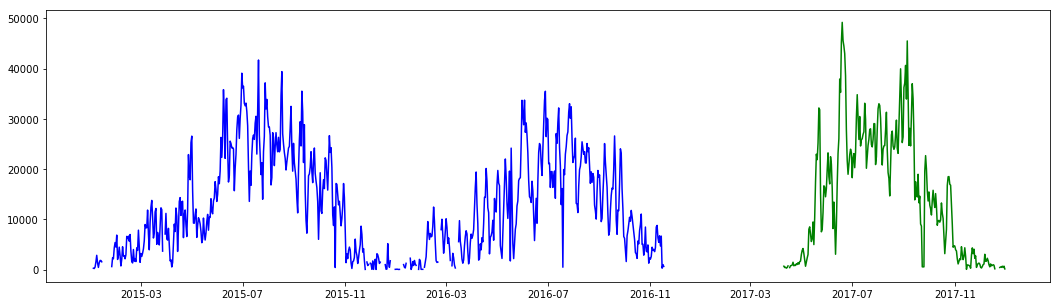

In [16]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)
ax.plot(dc.pre[dc.com],color='b')
ax.plot(dc.post[dc.com],color='g')
plt.show()

# Many Linear Models

        AIC       AR2        R2          MSE postDiff                              params                                            summary
10   9606.7  0.923264  0.925354  7.18292e+06  94728.5   CDH + HDH + C(month) + C(weekend)                                     OLS Regress...
23  9622.09  0.920936  0.923089   7.4008e+06   110345  CDH + HDH2 + C(month) + C(weekend)                                     OLS Regress...
24  9636.75  0.918499  0.920561  7.62886e+06   103417         CDH + C(month) + C(weekend)                                     OLS Regress...


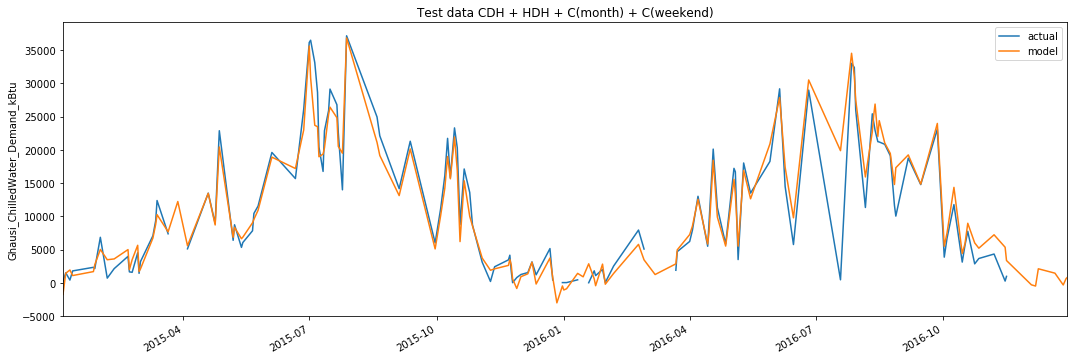

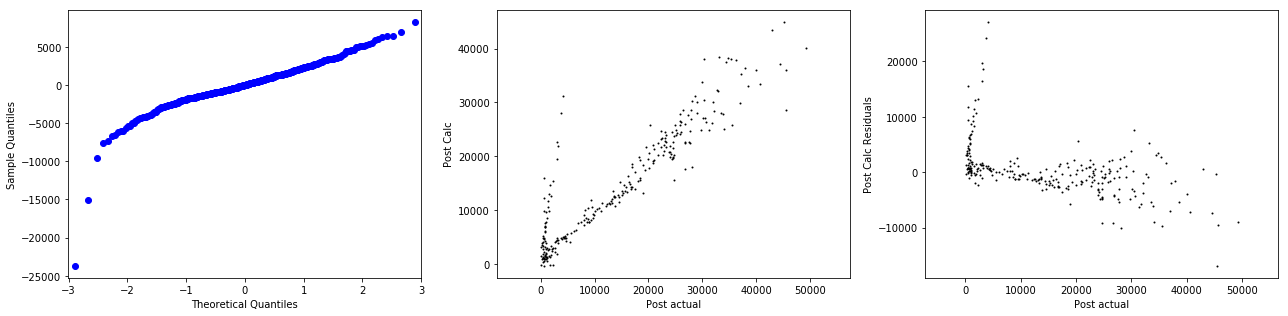

In [10]:
inputDict = {}

allmod = mnv.many_ols(dc.pre, dc.post, inputParams=['', 'C(month)','C(weekend)'])

allmod.run_all_linear()
print(allmod.statsPool[0:3])
allmod.plot_pool(1)
topParams = allmod.statsPool.iloc[0]['params']

# Single Linear Model

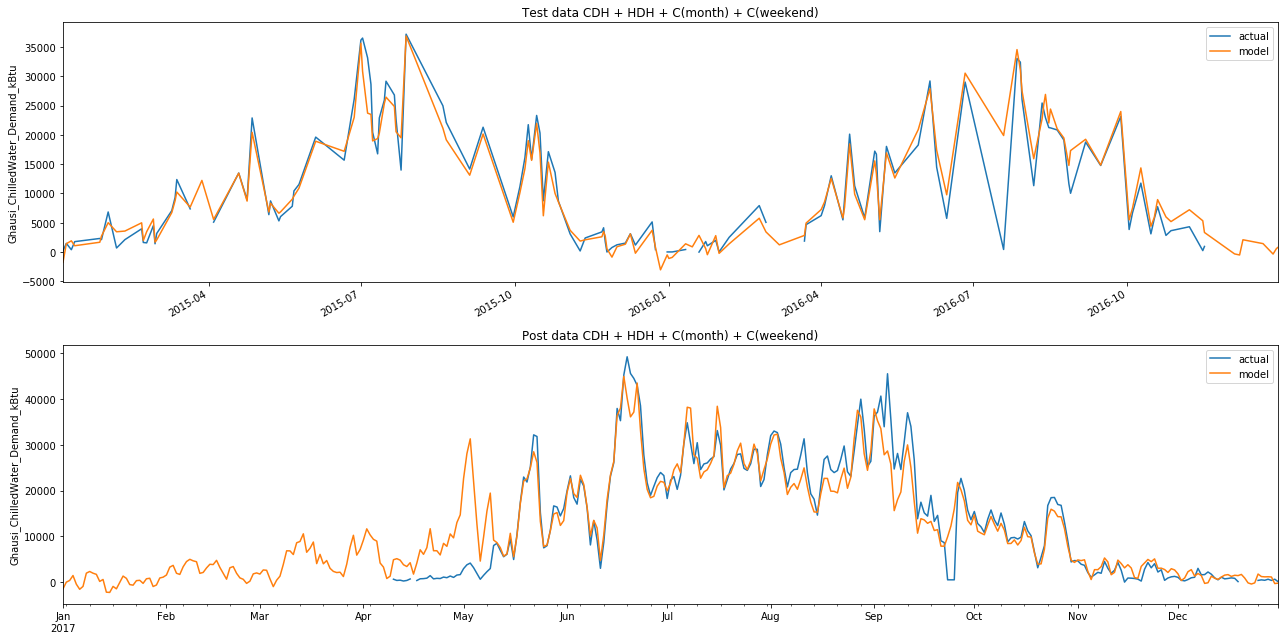

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Ghausi_ChilledWater_Demand_kBtu   R-squared:                       0.925
Model:                                         OLS   Adj. R-squared:                  0.923
Method:                              Least Squares   F-statistic:                     442.7
Date:                             Fri, 08 Jun 2018   Prob (F-statistic):          4.14e-271
Time:                                     07:48:53   Log-Likelihood:                -4788.4
No. Observations:                              515   AIC:                             9607.
Df Residuals:                                  500   BIC:                             9670.
Df Model:                                       14                                         
Covariance Type:                         nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5540.7599    859.693      6.445      0.000    3851.704    7229.816
C(month)[T.2]     751.2015    694.162      1.082      0.280    -612.632    2115.035
C(month)[T.3]    -153.6468    725.749     -0.212      0.832   -1579.540    1272.247
C(month)[T.4]     606.7761    753.306      0.805      0.421    -873.259    2086.811
C(month)[T.5]     519.8763    791.713      0.657      0.512   -1035.617    2075.370
C(month)[T.6]    2604.8313    890.450      2.925      0.004     855.346    4354.316
C(month)[T.7]    3228.0470    910.087      3.547      0.000    1439.982    5016.112
C(month)[T.8]    2661.9392    890.000      2.991      0.003     913.339    4410.540
C(month)[T.9]    -264.6587    858.445     -0.308      0.758   -1951.262    1421.945
C(month)[T.10]    376.3118    820.722      0.459      0.647   -1236.177    1988.801
C(month)[T.11]    653.2066    710.317      0.920      0.358    -742.368    2048.781
C(month)[T.12]    369.0595    851.591      0.433      0.665   -1304.078    2042.197
C(weekend)[T.1] -1532.9627    265.711     -5.769      0.000   -2055.010   -1010.915
CDH                59.9584      1.820     32.936      0.000      56.382      63.535
HDH               -12.9357      2.283     -5.666      0.000     -17.421      -8.450
==============================================================================
Omnibus:                      259.536   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4533.737
Skew:                          -1.765   Prob(JB):                         0.00
Kurtosis:                      17.100   Cond. No.                     3.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
params = topParams

mod = mnv.ols_model(dc.pre, dc.post, params)
mod.model_plot()

plt.show() # Show plot before Stats summary
mod.Fit.summary()

In [ ]:
mod.Fit.

### Savings

/Users/decolvin/anaconda/envs/MnV_Stuff/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


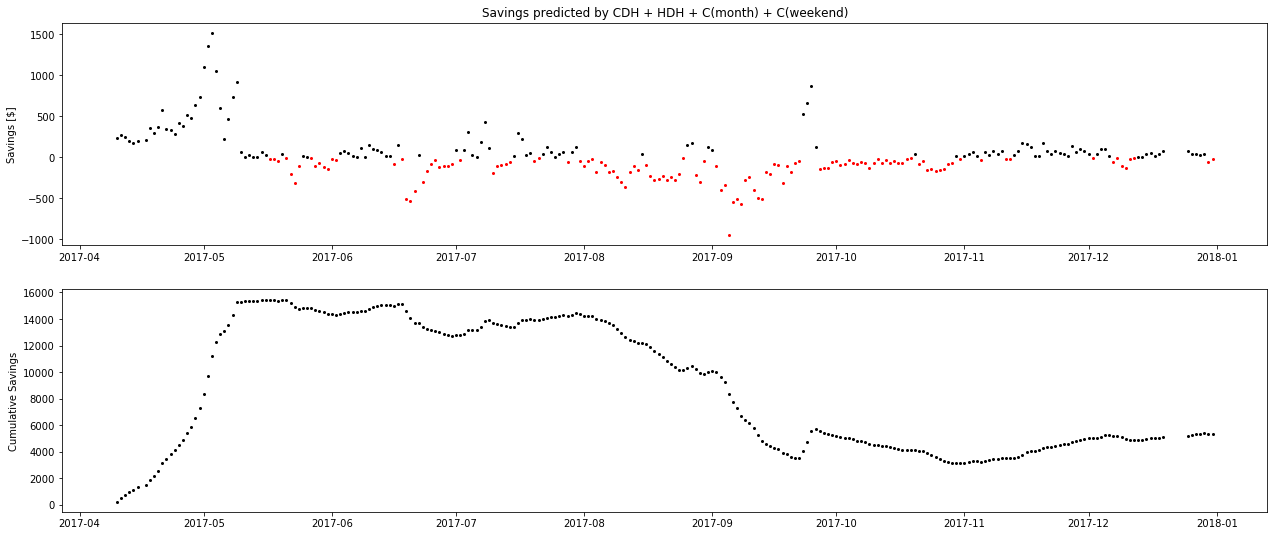

5304.79369805


In [12]:
rates = {'chw':0.056, 'steam':0.0157, 'elec':0.030} #kBTU prices for 2016(?)
commodity = 'chw'

mod.savings_plot(yaxis='dollars', rate=rates[commodity])
print(mod.postCumsum * rates[commodity])